In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Circle

In [2]:
def dipole_polar(r, theta):
    
    c0 = -BE*(RE/r)**3
    
    Br  = c0*2*np.cos(theta)
    Bth = c0*np.sin(theta)
    
    return Br, Bth

def vectorTransform_cartesian2D(vr, vtheta, r, theta):
    
    vx = vr*np.cos(theta)-vtheta*np.sin(theta)
    vy = vr*np.sin(theta)+vtheta*np.cos(theta)
    
    return vx, vy


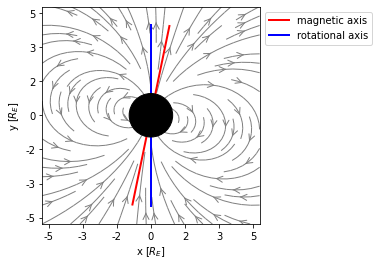

In [3]:
'''
Earth Dipole Field Model
'''

BE = 3.12e-5 # mag. field strength at surface of earth [T]
RE = 6370    # radius of earth [km]

tilt = np.radians(11.7) # tilt of magnetic axis [rad]
adj = np.pi/2 + tilt    # plot correction 

dn   = 1000
nmax = 5*RE
n    = np.linspace(-nmax, nmax, dn)

x, y = np.meshgrid(n,n)
r = np.sqrt(x**2+y**2)
theta = np.arctan2(y, x)

theta_adj = [x+adj for x in theta]


Br, Btheta = dipole_polar(r, theta_adj)

# transform to cartesian coordinates
Bx, By = vectorTransform_cartesian2D(Br, Btheta, r, theta)

# magnetic axis
magscale = 0.17
magaxis_x = np.linspace(-nmax*magscale, nmax*magscale,dn)
magaxis_y = np.tan(-adj)*magaxis_x

# rotational axis
rotscale = magscale-1.
rotaxis_x = np.zeros(dn)
rotaxis_y = np.linspace(-nmax*rotscale, nmax*rotscale,dn)


fig, ax = plt.subplots()

mag = np.sqrt(Bx**2+By**2)
#ax.contour(x,y,mag, 20)
ax.streamplot(x, y, Bx, By, color='grey', linewidth=1, density=.8, arrowstyle='->', arrowsize=1.5)

ax.plot(magaxis_x, magaxis_y, c='r', linewidth=2, label = 'magnetic axis')
ax.plot(rotaxis_x, rotaxis_y, c='b', linewidth=2, label = 'rotational axis')

# scale axis by RE
scale = ticker.FuncFormatter(lambda x, pos: '{0:.0f}'.format(x/RE))
ax.xaxis.set_major_formatter(scale)
ax.yaxis.set_major_formatter(scale)


# Add a filled circle for the Earth; make sure it's on top of the streamlines.
ax.add_patch(Circle((0,0), RE, color='k', zorder = 10))
ax.set_aspect('equal')


ax.set_xlabel("x [$R_E$]")
ax.set_ylabel("y [$R_E$]")
ax.legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))

# save figure
fname = 'plot_2d_dipole_bfield'
plt.savefig('../bin/'+fname+'.png',bbox_inches='tight', dpi=150)